# Monte Carlo Error Propagation


## Learning Objectives

After studying this notebook, completing the activities, engaging in class, and reading the book, you should be able to:
* Understand and apply Monte Carlo error propogation 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook we will take the motivating car and incline example from [this notebook](../12/Car-and-Incline-Example.ipynb) a step further to apply Monte Carlo Error Propogation.

## Analytic Error Propagation for Student 1

In [3]:
## Results of 'standard' error analysis (from homework)

# define distance travelled
l = 1 # m 

# define function to calculate a1
calc_a1 = lambda v: v**2 / (2*l)

# define velocity measurement and uncertainty
v = 3.2
v_std = 0.1

# calculate a1
a1 = calc_a1(v)

# estimate gradient with forward finite difference
da1dv = (calc_a1(v + 1E-6) - a1)/(1E-6)

# calculate uncertainty
sigma_a1 = abs(da1dv)*v_std

# report answer
print("Calculated acceleration: ",round(a1,2),"+/-",round(sigma_a1,2),"m/s/s")

Calculated acceleration:  5.12 +/- 0.32 m/s/s


## Monte Carlo Error Propagation for Student 1

We can also estimate the uncertainty in $a_1$ using simulation. See more about simulation in [this notebook.](../12/Simulation.ipynb) Below is the **main idea**.

Repeat 1000s of times:
* Add $\mathcal{N}(0,0.1^2)$ uncertainty to velocity measurement
* Recalculate $a_1$ and store result

Then calculate the standard deviation of the stored $a_1$ results. In other words, we are simulated what would happen if we repeated the experiment many many times with an assumed random measurement error.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, complete the code below.
</div>

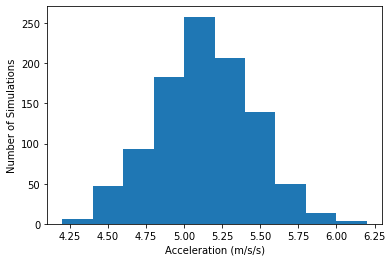

Mean:  5.132195705031086  m/s/s
Median:  5.123636307619483  m/s/s
Standard Deviation:  0.3177820622012161  m/s/s


In [4]:
# specify number of simulations
nsim = 1000

# create vector to store the results
a1_sim = np.zeros(nsim)

### BEGIN SOLUTION

# repeat many times
for i in range(0,nsim):
    
    # create normally distributed noise
    # loc = mean
    # scale = standard deviation
    noise = np.random.normal(loc = 0,scale = v_std)
    
    # calculate a1, store result
    a1_sim[i] = calc_a1(v + noise)

### END SOLUTION
    
# create histogram of calculated a1 values
plt.hist(a1_sim)
plt.xlabel("Acceleration (m/s/s)")
plt.ylabel("Number of Simulations")
plt.show()

# print some descriptive statistics
print("Mean: ",np.mean(a1_sim)," m/s/s")
print("Median: ",np.median(a1_sim)," m/s/s")
print("Standard Deviation: ",np.std(a1_sim)," m/s/s")

This standard deviation matches the uncertainty calculated with the error propagation formulas.

## Analytic Error Propagation for Student 2

In [5]:
## Results of 'standard' error analysis (from homework)

# define distance travelled
l = 1 # m

# define function to calculate a2
calc_a2 = lambda t: 2*l / t**2

# define time measurement and uncertainty
t = 0.63
t_std = 0.01

# calculate a2
a2 = calc_a2(t)

# estimate gradient with forward finite difference
da2dt = (calc_a2(t + 1E-6) - a2)/(1E-6)

# calculate uncertainty
sigma_a2 = abs(da2dt)*t_std

print("Calculated acceleration: ",round(a2,2),"+/-",round(sigma_a2,2),"m/s/s")

Calculated acceleration:  5.04 +/- 0.16 m/s/s


## Monte Carlo Error Propagation for Student 2

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Apply the Monte Carlo approach to Student 2's calculation. Start by copying and pasting the code from above.
</div>

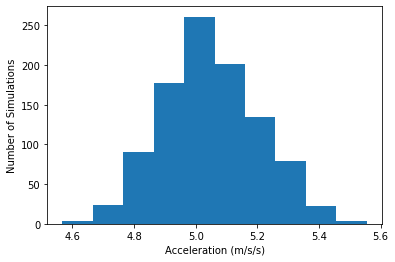

Mean:  5.047666385956689  m/s/s
Median:  5.039586271630645  m/s/s
Standard Deviation:  0.15621555703632722  m/s/s


In [6]:
### BEGIN SOLUTION

# specify number of simulations
nsim = 1000

# create vector to store the results
a2_sim = np.zeros(nsim)

# repeat many times
for i in range(0,nsim):
    
    # create normally distributed noise
    # loc = mean
    # scale = standard deviation
    noise = np.random.normal(loc = 0,scale = t_std)
    
    # calculate a1, store result
    a2_sim[i] = calc_a2(t + noise)
    
# create histogram of calculated a1 values
plt.hist(a2_sim)
plt.xlabel("Acceleration (m/s/s)")
plt.ylabel("Number of Simulations")
plt.show()

# print some descriptive statistics
print("Mean: ",np.mean(a2_sim)," m/s/s")
print("Median: ",np.median(a2_sim)," m/s/s")
print("Standard Deviation: ",np.std(a2_sim)," m/s/s")

### END SOLUTION